In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from latticefold import *
import seaborn as sns
%load_ext autoreload

# Protein Class

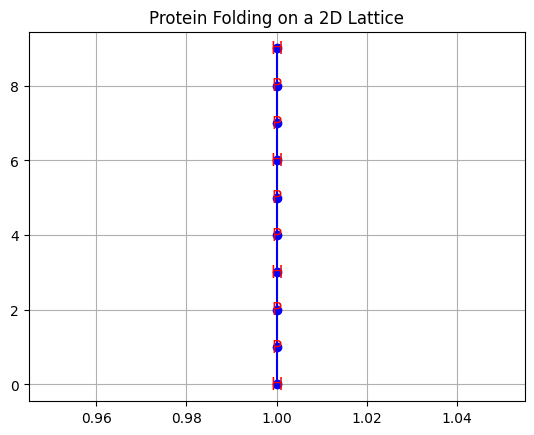

In [2]:
%autoreload
prot = Protein('HPPHPPHPPH')
visualize_lattice(positions=prot.structure, sequence=prot.sequence)
plt.show()

In [3]:
folding = prot.fold(max_iter=5000, temperature=10, cooling_rate=0.99)

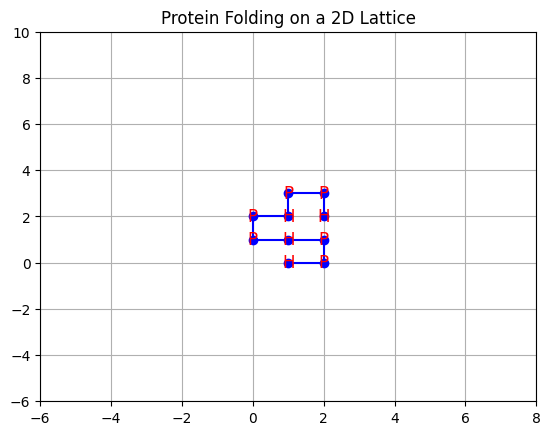

In [4]:
folding_gif(folding[::5], prot.sequence)

#### Changing the update rule

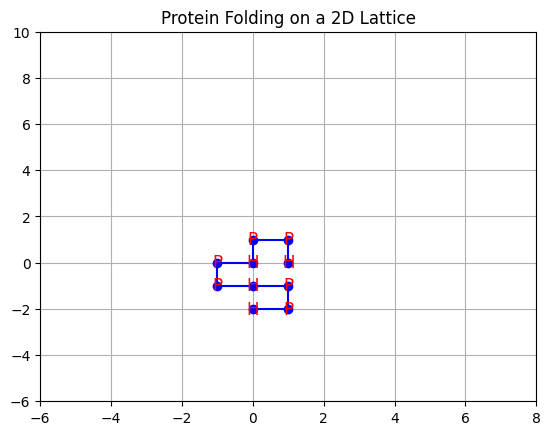

In [6]:
%autoreload
prot = Protein('HPPHPPHPPH')
folding_rot = prot.fold(max_iter=1000, temperature=10, cooling_rate=0.99, rules=['rotation'])
folding_gif(folding_rot[::5], prot.sequence,output_file='protein_folding_rot.gif')

### Grid Search for the best parameters (Temp, cooling rate)

In [7]:
from itertools import product
import pandas as pd
from tqdm import tqdm

%autoreload
# setting up ranges
temps=np.linspace(0,500,11)
coolrates=np.linspace(0.5,1,11)
iterations=np.arange(5)



df=pd.DataFrame(columns=['Sequence', 'Temperature', 'Cooling Rate', 'Rule', 'Iteration', 'Final Energy', 'Min Energy'])
for T, cr, i in tqdm(product(temps, coolrates, iterations)):
    seq='HPHPPHHPHPPHPHHPPHPH'
    prot=Protein(seq)
    folding, energies=prot.fold(2000, T, cr, 'all', output_energies=True)
    if len(energies)>0:
        df=pd.concat([df,
                      pd.DataFrame({'Sequence':seq,
                                    'Temperature':T,
                                    'Cooling Rate':cr,
                                    'Rule':'all',
                                    'Iteration':i,
                                    'Final Energy':energies[-1],
                                    'Min Energy':np.min(energies)},index=[0])])
df.to_csv('grid_search_results.csv')

0it [00:00, ?it/s]/tmp/ipykernel_165/2389184557.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df=pd.concat([df,
605it [35:01,  3.47s/it]


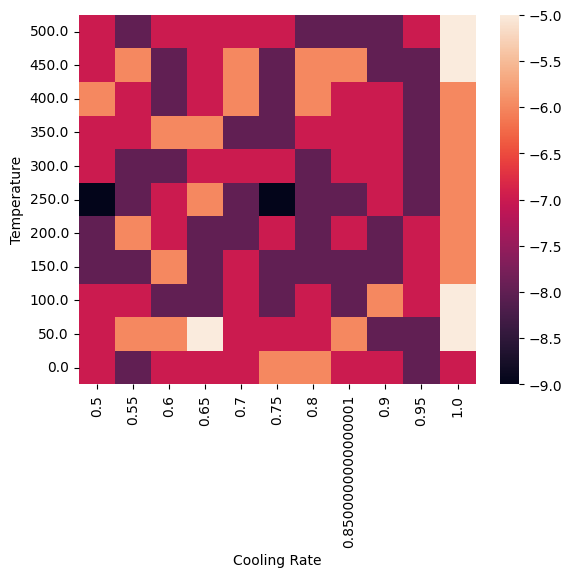

In [12]:
ax = sns.heatmap(df.groupby(['Temperature', 'Cooling Rate'])[['Final Energy', 'Min Energy']]
            .min()
            .reset_index()
            .pivot(index='Temperature', columns='Cooling Rate', values='Min Energy').astype(float))
plt.gca().invert_yaxis()

In [13]:
df.sort_values('Min Energy')

,Sequence,Temperature,Cooling Rate,Rule,Iteration,Final Energy,Min Energy
0,HPHPPHHPHPPHPHHPPHPH,250.0,0.75,all,0,-9,-9
0,HPHPPHHPHPPHPHHPPHPH,250.0,0.50,all,2,-9,-9
0,HPHPPHHPHPPHPHHPPHPH,200.0,0.50,all,0,-8,-8
0,HPHPPHHPHPPHPHHPPHPH,350.0,0.75,all,3,-8,-8
0,HPHPPHHPHPPHPHHPPHPH,150.0,0.90,all,3,-8,-8
...,...,...,...,...,...,...,...
0,HPHPPHHPHPPHPHHPPHPH,100.0,0.90,all,3,-4,-4
0,HPHPPHHPHPPHPHHPPHPH,500.0,1.00,all,4,0,-4
0,HPHPPHHPHPPHPHHPPHPH,500.0,0.70,all,0,-3,-3
0,HPHPPHHPHPPHPHHPPHPH,0.0,0.65,all,2,-3,-3
